# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load Data

In [3]:
#   Load the dataset
mall_data = pd.read_csv('Mall_Customers.csv')
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Data Overview

In [4]:
# Display the shape of the dataset
print("Shape of the dataset:", mall_data.shape)

Shape of the dataset: (200, 5)


In [5]:
# Display Information about the dataset
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Display Summary statistics of the dataset
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Checking duplicate values
duplicate_values = mall_data.duplicated().sum()
print("Number of duplicate values:", duplicate_values)

Number of duplicate values: 0


In [8]:
# Check for missing values
missing_values = mall_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# 4.  EDA (Exploratory Data Analysis)

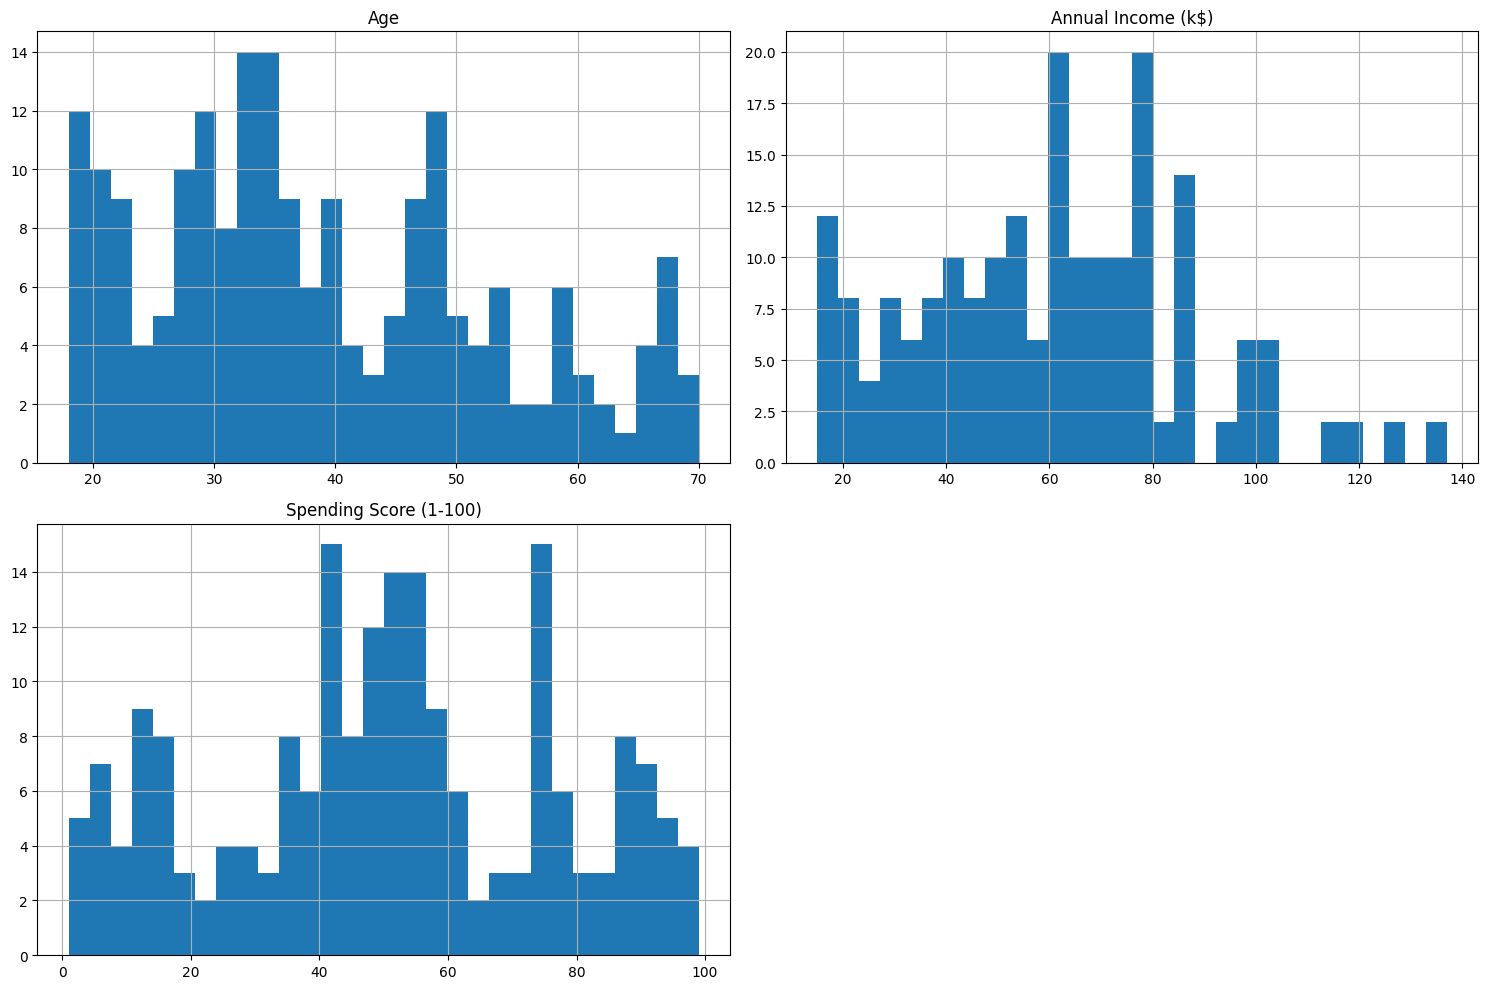

In [9]:
# Visualize the distribution of all numerical features
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
mall_data[num_cols].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

The dataset shows diverse customer demographics with a concentration in the productive age range (20–40 years). Income distribution is broad, allowing the identification of high-value segments. Spending behavior varies significantly, supporting the effectiveness of K-Means clustering for behavioral segmentation.

# 5. Feature Selection & Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

# Feature selection for clustering
X = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

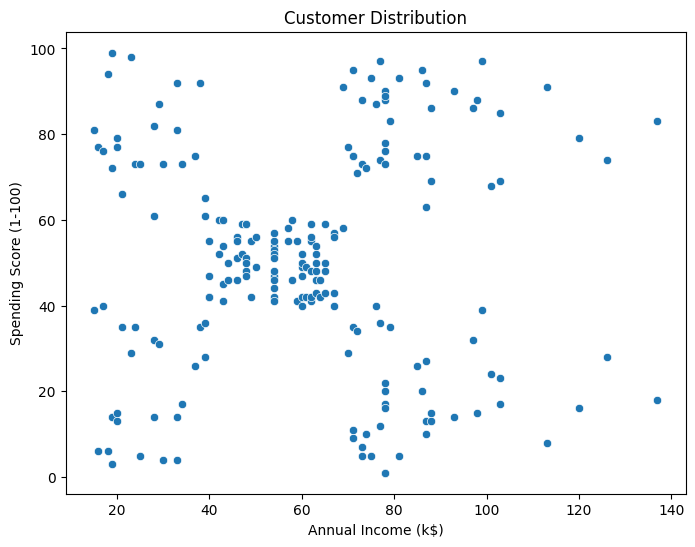

In [11]:
# Visualization of distribution of standardized features
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'])
plt.title('Customer Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# 6. Elbow Shilouette Method

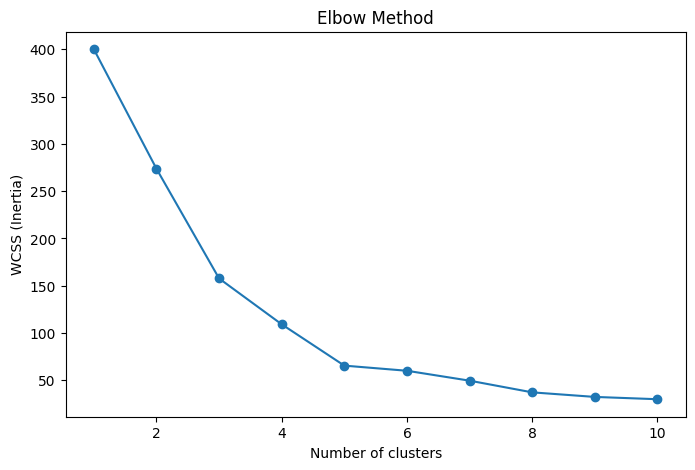

Silhouette score for k=2: 0.397
Silhouette score for k=3: 0.467
Silhouette score for k=4: 0.494
Silhouette score for k=5: 0.555
Silhouette score for k=6: 0.514
Silhouette score for k=7: 0.502
Silhouette score for k=8: 0.455
Silhouette score for k=9: 0.457
Silhouette score for k=10: 0.445


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

# Silhouette Score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette score for k={k}: {score:.3f}")


The most reasonable "elbow" point appears to be around k = 4 or k = 5.
k = 5 gives the highest score (0.555).

Silhouette Interpretation:

- 0.5 = fairly strong cluster structure
- 0.25–0.5 = moderate structure
- < 0.25 = weak

So 0.555 is considered quite good for clustering customer segmentation.

Business interpretability → 5

# 7. K-Means Clustering

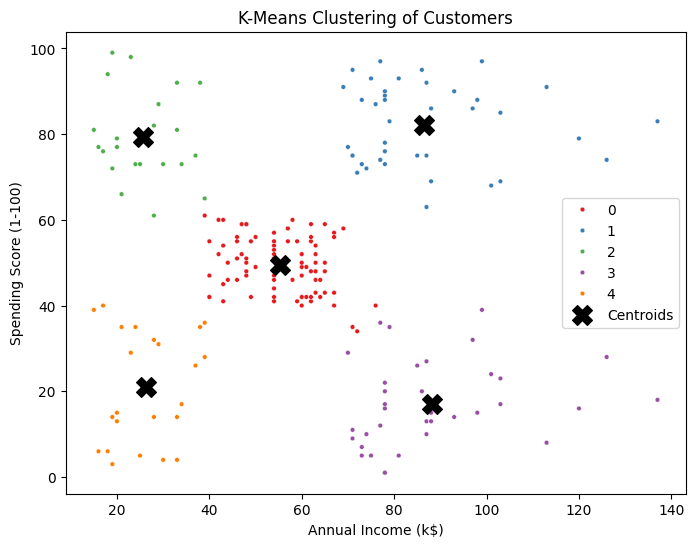

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
mall_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=mall_data['Cluster'], palette='Set1', s=11)

plt.scatter(
    kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
    kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
    s=200, c='black', marker='X', label='Centroids'
)

plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The clustering result clearly separates customers into five distinct behavioral groups. High-income customers are divided into premium spenders and low-engagement customers, highlighting significant growth opportunities. The segmentation enables targeted marketing strategies instead of one-size-fits-all campaigns.

# 8. DBSCAN

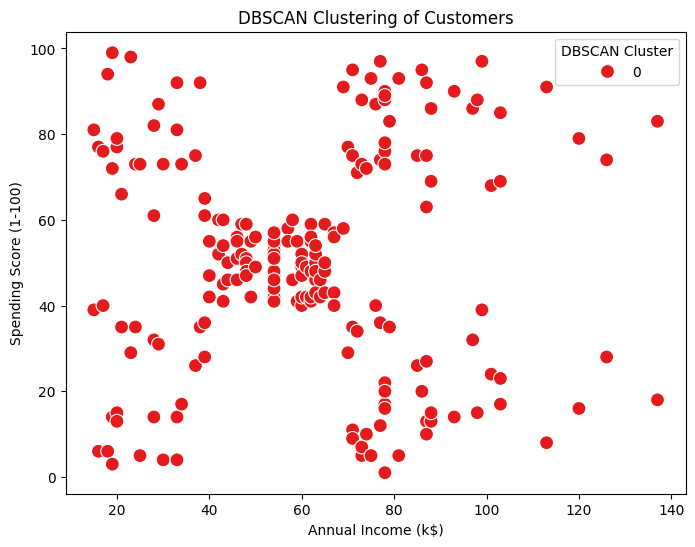

In [14]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
mall_data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=mall_data['DBSCAN_Cluster'], palette='Set1', s=100)
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='DBSCAN Cluster')
plt.show()    

Compared to K-Means, DBSCAN did not produce meaningful customer segmentation. Most data points were grouped into a single cluster, indicating that the dataset does not exhibit strong density-based separation. Therefore, K-Means is more suitable for this customer segmentation task.

Analyze Average Spending Cluster

Cluster Summary:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


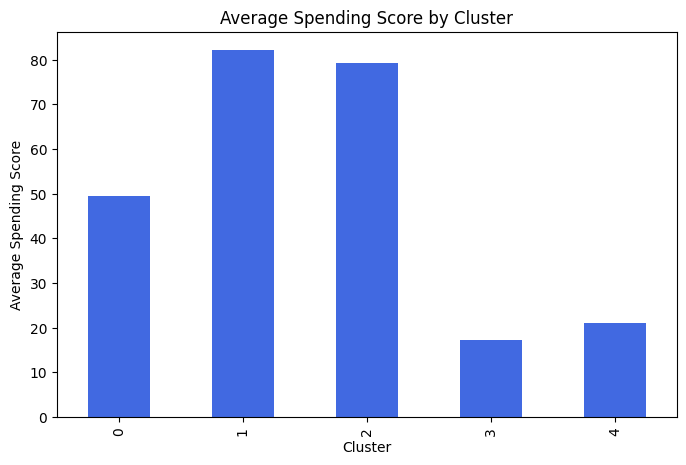

In [15]:
# Analyze the characteristics of each cluster
cluster_summary = mall_data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Summary:\n", cluster_summary)

# Bar Plot 
cluster_summary['Spending Score (1-100)'].plot(kind='bar', color='royalblue', figsize=(8,5))
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Cluster')
plt.show()

🧠 Business Insight per Cluster

Cluster 0 – “Mass Market”
- Moderate income
- Moderate spending

📌 Strategy:
- General promotion
- Volume-based sales

Cluster 1 – “Premium Customers”
- High income
- High spending
- High value segment
- Loyal & profitable

📌 Strategy:
- Loyalty program
- VIP membership
- Exclusive offers

Cluster 2 – “Young Big Spenders”
- Low income
- High spending

📌 Strategy:
- Trend-based campaign
- Flash sale
- BNPL / installment option

Cluster 3 – “Rich but Unengaged”
- High income
- Low spending

📌 Strategy:
- Personalized marketing
- Premium bundling
- Retargeting campaign

Cluster 4 – “Low Value Segment”
- Low income
- Low spending

📌 Strategy:
- Cost-efficient campaign
- No need for major marketing focus

# Profiling

In [16]:
profile = mall_data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Total Customers'})

print("Cluster Profile:\n", profile)

Cluster Profile:
                Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                          
0        42.716049           55.296296               49.518519   
1        32.692308           86.538462               82.128205   
2        25.272727           25.727273               79.363636   
3        41.114286           88.200000               17.114286   
4        45.217391           26.304348               20.913043   

         Total Customers  
Cluster                   
0                     81  
1                     39  
2                     22  
3                     35  
4                     23  


Cluster 0 – Mass Market (Largest Group – 81 Customers)
 - Moderate income
 - Moderate spending
 - Largest population

🎯 Stable revenue backbone.

Strategy:
 - General promotion
 - Volume-based campaign
 - Seasonal discount

Cluster 1 – Premium Customers (High Value Segment)
 - High income
 - Very high spending
 - Relatively young age (32 years old)
 - 39 customers

🎯 This is the core revenue driver.

 Strategy:
 - Loyalty program
 - VIP event
 - Personalized premium offers
 - Upselling luxury items

Cluster 2 – Young High Spenders
 - Youngest age (25 years old)
 - Low income
 - High spending

🎯 Likely lifestyle-driven, impulsive buyers.

Strategy:
 - Flash sales
 - Trend marketing
 - Social media campaigns
 - BNPL / installment options

⚠ Risk: Can churn if their economy declines.

Cluster 3 – High Income Low Spending (Opportunity Segment)

 - Very high income
 - Very low spending
 - More mature age (41 years old)

🎯 This is a GOLD opportunity.

They can afford to buy, but are not yet engaged.

Strategy:
 - Personalized targeting
 - Email retargeting
 - Bundling premium products
 - Customer experience improvement

⚪ Cluster 4 – Low Value Segment

 - Low income
 - Low spending
 - Oldest age (45 years old)

🎯 No need for a heavy marketing budget.

Strategy:
 - Basic promotions
 - Mass campaign
 - Cost-efficient targeting

📈 Segment Distribution Insight
Total customers:
Cluster 0 → 40.5% (81 people)
Cluster 1 → 19.5%
Cluster 3 → 17.5%
Cluster 4 → 11.5%
Cluster 2 → 11%

👉 This means your market is dominated by the mid-market.

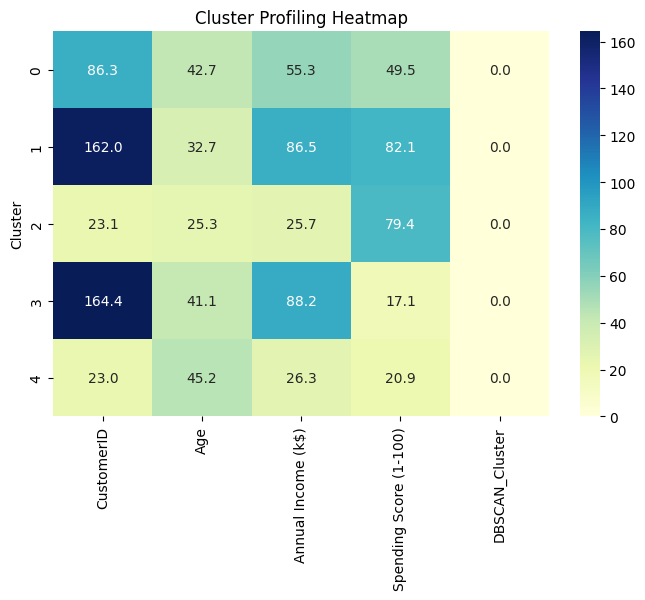

In [17]:
cluster_profile = mall_data.groupby('Cluster').mean(numeric_only=True)

plt.figure(figsize=(8,5))
sns.heatmap(cluster_profile, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Cluster Profiling Heatmap')
plt.show()


## Radar Chart

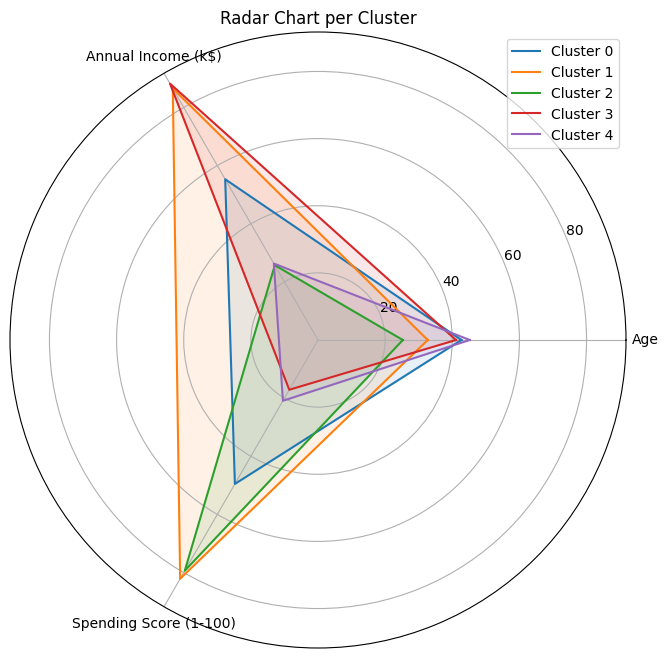

In [18]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
num_clusters = cluster_profile.shape[0]

angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8,8))

for i in range(num_clusters):
    values = cluster_profile.loc[i, features].tolist()
    values += values[:1]
    
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)
plt.title("Radar Chart per Cluster")
plt.legend(loc='upper right')
plt.show()


## Hierarchical Clustering Dendogram

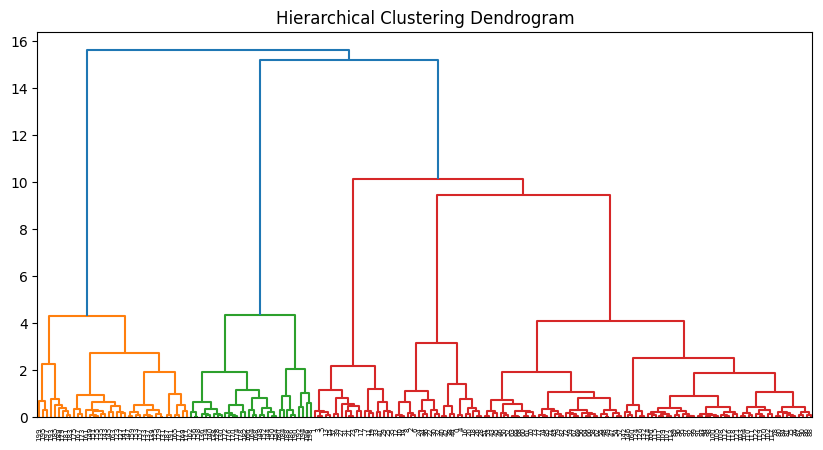

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


Silhouette Score

In [21]:
from sklearn.metrics import silhouette_score

# KMeans
kmeans_score = silhouette_score(X_scaled, mall_data['Cluster'])

# DBSCAN (exclude noise label -1 jika ada)
db_labels = mall_data['DBSCAN_Cluster']
if len(set(db_labels)) > 1 and -1 not in set(db_labels):
    dbscan_score = silhouette_score(X_scaled, db_labels)
else:
    dbscan_score = "Cannot compute (noise present)"

# Hierarchical
hier_score = silhouette_score(X_scaled, mall_data['Hierarchical_Cluster'])

print("KMeans Silhouette:", kmeans_score)
print("DBSCAN Silhouette:", dbscan_score)
print("Hierarchical Silhouette:", hier_score)


KMeans Silhouette: 0.5546571631111091
DBSCAN Silhouette: Cannot compute (noise present)
Hierarchical Silhouette: 0.5538089226688662


In [22]:
import pickle

# Save the KMeans model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)  

# Save Scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f) 

print("Models and scaler saved successfully.")

Models and scaler saved successfully.
